# 1. Set Up Environment and Install Dependencies
- Create and activate a Python virtual environment (venv/conda):
    ```bash
    python3 -m venv env 
    source env/bin/activate # Unix/MacOS
    ./env/Scripts/activate # Windows
    ```
    Alternatively: 
    ```bash
    conda env create -f environment.yml
    conda activate env
    ```

- Upgrade pip and install required libraries (skip if using conda):
    ```bash
    python3 -m pip install --upgrade pip
    pip install -r requirements.txt
    ```

**Note:** The main libraries are 'opencv-python' and 'mediapipe' for hand tracking and 'pyatv' for interacting with Apple TV.

# 2. Test the Camera

In [ ]:
import cv2  # Import the OpenCV library

# Open the video capture
# Index 0 = default internal webcam, 1 (or higher) = external webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the resulting frame
    cv2.imshow("frame", frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# After the loop release the cap object and destroy all windows
cap.release()
cv2.destroyAllWindows()

# 3. Implement Hand Tracking with Mediapipie
<img src="hand_landmarks.png" alt="Hand Landmarks" width="800" height="300">

In [ ]:
import mediapipe as mp  # Import mediapipe library
import cv2

# Open the video capture
cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands  # Initialize the hands model

# Create an instance of the model with specified minimum confidence values
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5)

# To help draw the landmarks onto the image
mp_drawing = mp.solutions.drawing_utils

# Specifying DrawingSpec for the hand landmarks and connections
# Red color (BGR) for landmarks
draw_spec_landmarks = mp_drawing.DrawingSpec(
    color=(0, 0, 255), thickness=2, circle_radius=2
)
# White color (BGR) for connections
draw_spec_connections = mp_drawing.DrawingSpec(
    color=(255, 255, 255), thickness=2, circle_radius=2
)

while True:
    ret, frame = cap.read()

    # Convert the BGR image to RGB before processing
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the image for hand detection
    results = hands.process(image)

    # Render the hand landmarks on the image
    if results.multi_hand_landmarks:  # If any hand is detected
        for hand_landmarks in results.multi_hand_landmarks:  # For each hand
            mp_drawing.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                draw_spec_landmarks,
                draw_spec_connections,
            )
    cv2.imshow("Hand Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

# 4. Define Hand Gestures for Apple TV Remote Control
<div style="display: flex; align-items: center;">
    <img src="atv_remote.png" alt="Apple TV Remote" width="300" height="auto" style="margin-right: 20px;">
    <div>
        <p>Here is the proposed mapping:</p>
        <table>
            <tr>
                <th>Apple TV Remote Control</th>
                <th>pyatv command</th>
                <th>Hand Gesture</th>
            </tr>
            <tr>
                <td>Power On</td>
                <td>power.turn_on</td>
                <td>Hold Open Palm for ~3 secs</td>
            </tr>
            <tr>
                <td>Power Off</td>
                <td>power.turn_off</td>
                <td>Hold Closed Fist for ~3 secs</td>
            </tr>
            <tr>
                <td>Scroll Up</td>
                <td>remote_control.up</td>
                <td>Pointer Finger Tip Movement Tracking</td>
            </tr>
            <tr>
                <td>Scroll Down</td>
                <td>remote_control.down</td>
                <td>Pointer Finger Tip Movement Tracking</td>
            </tr>
            <tr>
                <td>Scroll Left</td>
                <td>remote_control.left</td>
                <td>Pointer Finger Tip Movement Tracking</td>
            </tr>
            <tr>
                <td>Scroll Right</td>
                <td>remote_control.right</td>
                <td>Pointer Finger Tip Movement Tracking</td>
            </tr>
            <tr>
                <td>Select/Enter + Play/Pause</td>
                <td>remote_control.select</td>
                <td>Single Tap with Pointer Finger and Thumb</td>
            </tr>
            <tr>
                <td>Back/Exit</td>
                <td>remote_control.menu</td>
                <td>Thumb Pointing to the Left</td>
            </tr>
            <tr>
                <td>TV/Control Center</td>
                <td>remote_control.home</td>
                <td>Finger Gun Gesture with Thumb and Pointer Finger</td>
            </tr>
            <tr>
                <td>Volume Up (Coming Soon)</td>
                <td>audio.volume_up</td>
                <td>Two-Finger Swipe with Pointer and Middle Finger</td>
            </tr>
            <tr>
                <td>Volume Down (Coming Soon)</td>
                <td>audio.volumn_down</td>
                <td>Two-Finger Swipe with Pointer and Middle Finger</td>
            </tr>
        </table>
    </div>
</div>
<p><b>Note:</b> These are initial gesture definitions. They may need to be adjusted or refined during the implementation and testing process to ensure optimal user experience and recognition accuracy.</p>

# 5. Implement Hand Gesture Recognition

### Step 1: Data Collection and Preparation

User Guide:

- **Run the Data Collection Script (Cell Below):** Start the script, which will open up your webcam feed.

- **Perform the Hand Gestures:** Clearly present one of your target hand gestures to the webcam.

- **Assign a Keyboard Input for Each Gesture:** Use the corresponding number keys to map the performed gesture:
  - Press "1" for "power_on" gesture.
  - Press "2" for "power_off" gesture.
  - Press "3" for "scroll" gesture.
  - Press "4" for "click"/"tap" gesture.
  - Press "5" for "menu" gesture.
  - Press "6" for "home" gesture.
  - Press "7" for "volume" gesture.  
  <br>
- **Collect Multiple Samples:** Hold down the key while maintaining the gesture in front of the camera to collect multiple samples.

- **Save Images and Landmarks:** The script will automatically save images and corresponding landmarks in a directory named "data".

<b>Note:</b> This guide provides a basic method for collecting hand gesture data. Feel free to experiment and customize to meet your specific needs.

In [ ]:
# Import necessary libraries
import mediapipe as mp
import numpy as np
import cv2
import os
import time

# Open the video capture
cap = cv2.VideoCapture(0)

mp_hands = mp.solutions.hands  # Initialize the hands model

# Create an instance of the model with specified minimum confidence values
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5)

# To help draw the landmarks onto the image
mp_drawing = mp.solutions.drawing_utils

# Specifying DrawingSpec for the hand landmarks and connections
# Red color (BGR) for landmarks
draw_spec_landmarks = mp_drawing.DrawingSpec(
    color=(0, 0, 255), thickness=2, circle_radius=2
)
# White color (BGR) for connections
draw_spec_connections = mp_drawing.DrawingSpec(
    color=(255, 255, 255), thickness=2, circle_radius=2
)

# Create a "data" folder to store gesture class subfolders
os.makedirs("data", exist_ok=True)

# Create folders for each gesture class and corresponding key
gesture_classes = {
    ord("1"): "power_on",
    ord("2"): "power_off",
    ord("3"): "scroll",
    ord("4"): "click",  # Equivalent to "tap" gesture
    ord("5"): "menu",
    ord("6"): "home",
    # ord("7"): "volume"
}

# Create subfolders for each gesture class under the "data" folder
for gesture_class in gesture_classes.values():
    os.makedirs(os.path.join("data", gesture_class), exist_ok=True)

# Counter to keep track of captured images for each class
image_counter = {gesture_class: 1 for gesture_class in gesture_classes.values()}

# Variables for capturing data with a time interval
last_capture_time = 0
capture_interval = 0.5

while True:
    ret, frame = cap.read()

    # Convert the BGR image to RGB before processing
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the image for hand detection
    results = hands.process(image)

    # Render the hand landmarks on the image
    if results.multi_hand_landmarks:  # If any hand is detected
        for hand_landmarks in results.multi_hand_landmarks:  # For each hand
            mp_drawing.draw_landmarks(
                frame,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                draw_spec_landmarks,
                draw_spec_connections,
            )
    cv2.imshow("Hand Tracking", frame)

    # Check for keyboard input to save the image
    key = cv2.waitKey(1)
    if key in gesture_classes:
        gesture_class = gesture_classes[key]

        # Check if enough time has passed since the last capture
        if time.time() - last_capture_time >= capture_interval:
            class_dir = os.path.join("data", gesture_class)
            image_path = os.path.join(
                class_dir, f"{gesture_class}_{image_counter[gesture_class]}.png"
            )
            cv2.imwrite(image_path, frame)

            # Save the hand landmarks as a numpy array
            landmarks_path = os.path.join(
                class_dir, f"{gesture_class}_{image_counter[gesture_class]}.npy"
            )
            landmarks = np.array(
                [
                    [landmark.x, landmark.y, landmark.z]
                    for landmark in hand_landmarks.landmark
                ]
            )
            np.save(landmarks_path, landmarks)

            # Increment the image counter
            image_counter[gesture_class] += 1

            # Update the last capture time
            last_capture_time = time.time()

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

### Step 2: Load and Visualize Hand Gesture Data

In [1]:
# Import necessary libraries
import os
import numpy as np
import cv2

# Define the directory where data is stored
data_folder = "data"

# Define hand gestures and lists to store the loaded data
gestures = ["power_on", "power_off", "scroll", "menu", "home", "click"]
images = []
landmarks = []
labels = []

# Loop through the gesture classes
for gesture_class in gestures:
    class_dir = os.path.join(data_folder, gesture_class)

    # Get lists of image files and landmarks files for the current gesture class
    image_files = [f for f in os.listdir(class_dir) if f.endswith(".png")]
    landmarks_files = [f for f in os.listdir(class_dir) if f.endswith(".npy")]

    # Loop through the image and landmarks files and load them
    for image_file, landmarks_file in zip(image_files, landmarks_files):
        image_path = os.path.join(class_dir, image_file)
        landmarks_path = os.path.join(class_dir, landmarks_file)

        # Load the image
        image = cv2.imread(image_path)

        # Load the hand landmarks
        landmarks_data = np.load(landmarks_path)

        # Append the loaded image, landmarks, and class label to the lists
        images.append(image)
        landmarks.append(landmarks_data)
        labels.append(gesture_class)

# Convert the lists to arrays
images = np.array(images)
landmarks = np.array(landmarks)
labels = np.array(labels)

# Print out the shapes of the data arrays
print(f"Shape of images array: {images.shape}")
print(f"Shape of landmarks array: {landmarks.shape}")
print(f"Shape of labels array: {labels.shape}")

Shape of images array: (3000, 480, 640, 3)
Shape of landmarks array: (3000, 21, 3)
Shape of labels array: (3000,)


In the output:

- `images` shape: (3000, 480, 640, 3)
    
    - 3000 images
    - Each image: 480 x 640 pixels, 3 color channels (RGB)
    
    <br>
- `landmarks` shape: (3000, 21, 3)

    - 3000 sets of hand landmarks
    - Each set: 21 points, each point has 3 coordinates (x, y, z)
    
    <br>
- `labels` shape: (3000,)

    - 3000 labels, each corresponding to a gesture class
    <br>

For my usage, I collected 500 images for each of the 6 gesture classes, the total is 6*500 = 3000, matching the first dimensions of the `images`, `landmarks`, and `labels` arrays.

<p><b>Note:</b> It is crucial to make sure the dimensions of all the data you collected and loaded are correct before proceeding. </p>

### Run This Cell to Visualize the Hand Gesture Data: 

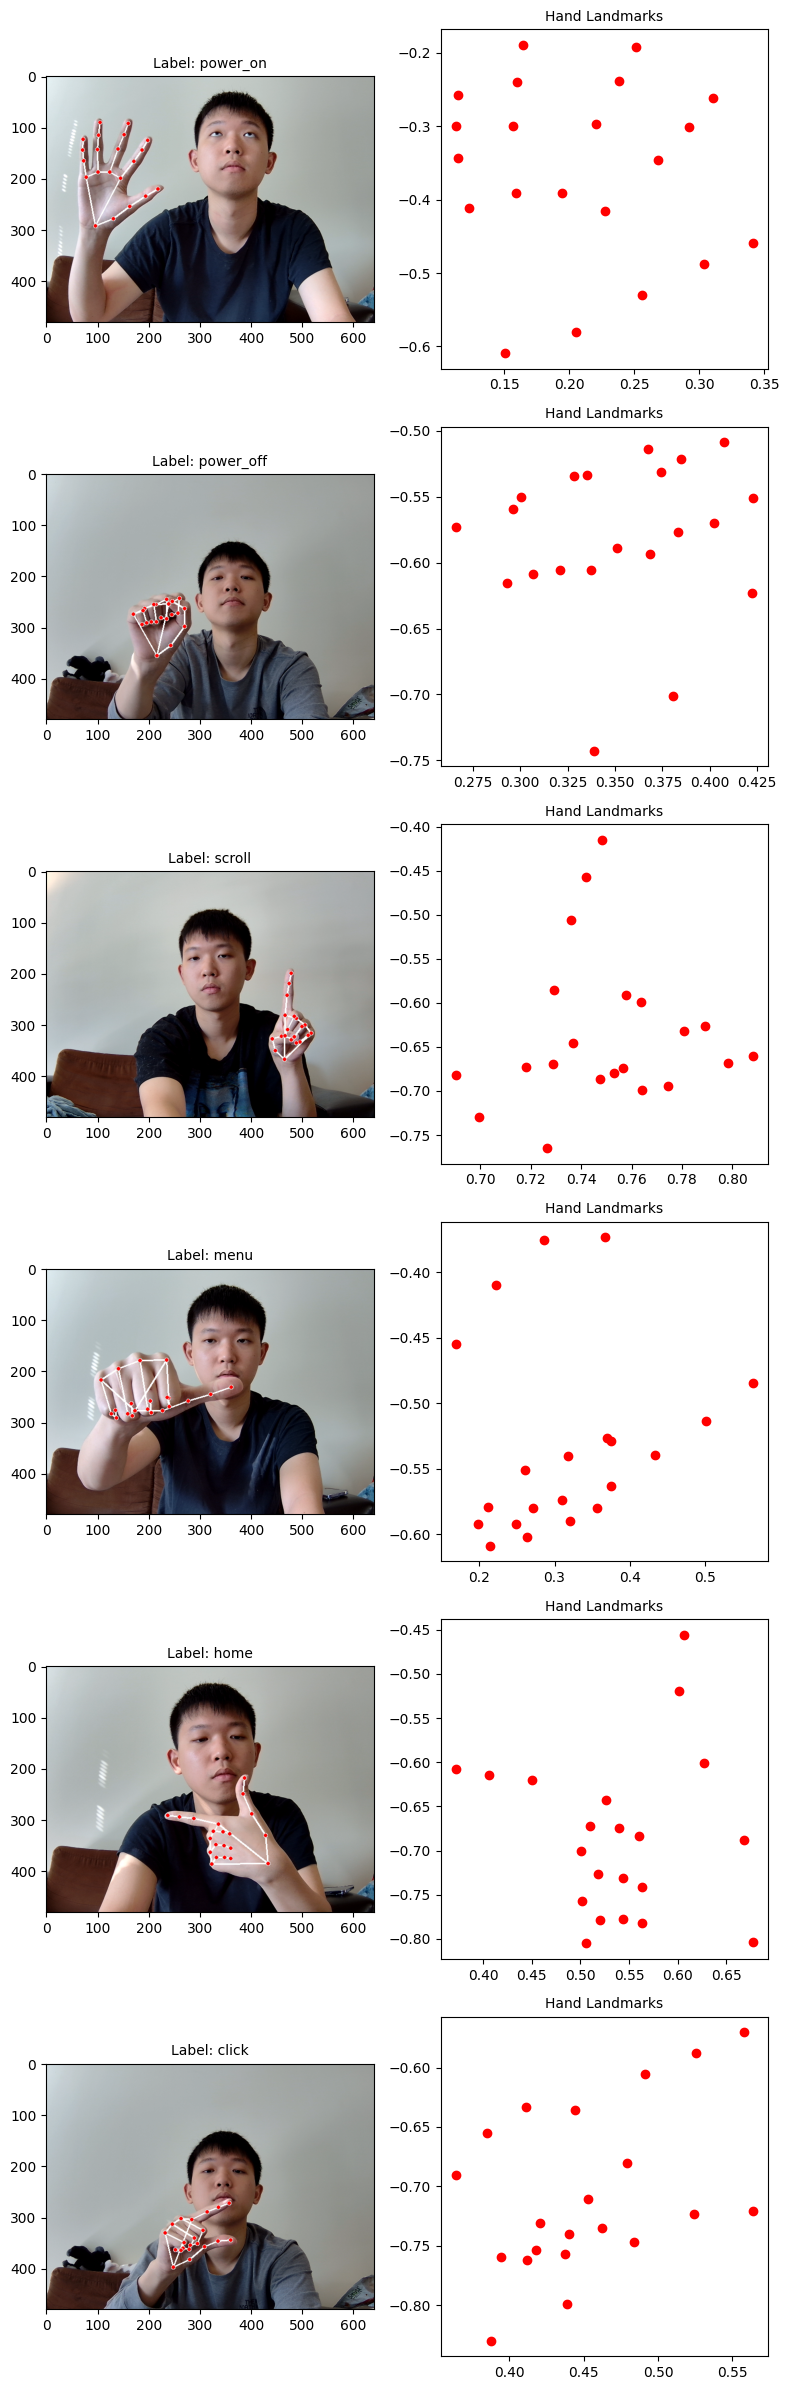

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Create subplots with 6 rows and 2 columns
fig, axes = plt.subplots(nrows=len(gestures), ncols=2, figsize=(8, 24))

# Loop through the gesture classes
for i, gesture_class in enumerate(gestures):
    # Get indices of images for the current gesture class
    class_indices = np.where(labels == gesture_class)[0]

    # Randomly select 1 index for display
    random_index = np.random.choice(class_indices, 1, replace=False)

    # Display the image on the left side of each row
    axes[i, 0].imshow(cv2.cvtColor(images[random_index[0]], cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(f"Label: {labels[random_index[0]]}", fontsize=10)

    # Flip the sign of y-coordinates of the hand landmarks
    flipped_landmarks = landmarks[random_index[0]][:, 1] * (-1)

    # Plot the hand landmarks (x, y) on the right side of each row
    axes[i, 1].plot(landmarks[random_index[0]][:, 0], flipped_landmarks, "ro")
    axes[i, 1].set_title("Hand Landmarks", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

<p><b>Note:</b> In image processing, the origin (0,0) is at the top-left corner, and the y-value increases downwards. I've flipped the y-values to align with a traditional coordinate system for a better view. </p>

### Step 3: Data Preprocessing and Splitting into Train/Test Sets

This step involves several essential data transformations:

- **Bounding Box Extraction:** A bounding box around the hand gesture in each image is determined using the landmarks_to_bbox() function.

- **Image Resizing:** The hand gestures isolated via the bounding box are resized to 224x224 pixels with the crop_and_resize_images() function

- **Convertion and Normalization:** The hand gesture images are converted to grayscale and then normalized to have pixel values between 0 and 1. 

- **Landmarks Processing:** The 3D landmarks data are reshaped to 2D by flattening the last two dimensions, making it suitable as model input.

- **Label Encoding:** The gesture class labels are mapped to integer values using a dictionary, allowing them to be used directly as model targets.

- **Train-Test Split:** Finally, the processed data — `images`, `landmarks`, `labels` — are divided into training and testing sets, with 80% of the data used for training and 20% kept for testing. 

In [3]:
# Function to calculate the bounding box for hand gesture based on landmarks
def landmarks_to_bbox(landmarks, padding_ratio=0.5):
    # Calculate minimum and maximum x, y coordinates
    x_min, y_min = np.min(landmarks, axis=0)[:2]
    x_max, y_max = np.max(landmarks, axis=0)[:2]

    # Determine the width and height of the bounding box
    bbox_width, bbox_height = x_max - x_min, y_max - y_min

    # Make the bounding box square by extending the shorter side
    max_side = max(bbox_width, bbox_height)
    x_min = x_min + (bbox_width - max_side) / 2
    y_min = y_min + (bbox_height - max_side) / 2
    x_max = x_min + max_side
    y_max = y_min + max_side

    # Add padding to capture the entire hand gesture
    padding_x = bbox_width * padding_ratio
    padding_y = bbox_height * padding_ratio
    x_min = max(0.0, x_min - padding_x)
    y_min = max(0.0, y_min - padding_y)
    x_max = min(1.0, x_max + padding_x)
    y_max = min(1.0, y_max + padding_y)

    # Return normalized bounding box coordinates
    return [x_min, y_min, x_max, y_max]


# Function to crop and resize images based on bounding boxes
def crop_and_resize_images(images, bounding_boxes, size=(224, 224)):
    cropped_resized_images = []

    for i in range(len(images)):
        # Get bounding box and image
        bbox = bounding_boxes[i]
        image = images[i]
        height, width, _ = image.shape

        # Convert normalized coordinates to pixel values
        x_min, y_min, x_max, y_max = (
            bbox * np.array([width, height, width, height])
        ).astype(int)

        # Crop image based on bounding box and resize it to the defined size
        cropped_image = image[y_min:y_max, x_min:x_max]
        resized_image = cv2.resize(cropped_image, size)

        # Append the processed image to the list
        cropped_resized_images.append(resized_image)

    # Return processed images as a numpy array
    return np.array(cropped_resized_images)


# Calculate bounding boxes for all landmarks
bounding_boxes = np.array([landmarks_to_bbox(landmark) for landmark in landmarks])

# Crop and resize all images based on their respective bounding boxes
hand_images = crop_and_resize_images(images, bounding_boxes)

### Run This Cell to Visualize the Extracted Hand Gesture Image: 

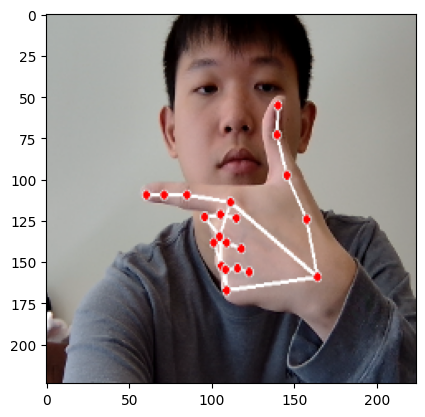

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Generate a random index
random_index = np.random.choice(len(hand_images))

# Select a random image from the dataset
random_image = hand_images[random_index]

# Convert the image from BGR to RGB
rgb_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(rgb_image)
plt.show()

### Continuing with Data Preprocessing and Train/Test Split: 

In [5]:
# Import train_test_split function from sklearn library
from sklearn.model_selection import train_test_split

# Convert hand gesture images to grayscale stored in a list
processed_images = [
    cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[..., np.newaxis] for img in hand_images
]

# Convert the list to a numpy array and normalize images to [0, 1]
processed_images = np.array(processed_images) / 255.0

# Prepare landmarks data by reshaping from 3D to 2D (flattening)
landmarks = landmarks.reshape(landmarks.shape[0], -1)

# Create a dictionary to map labels to integers
label_dict = {
    "power_on": 0,
    "power_off": 1,
    "scroll": 2,
    "menu": 3,
    "home": 4,
    "click": 5,
}

# Encode the labels using the dictionary mapping
labels = np.array([label_dict[label] for label in labels])

# Split the data into training and testing sets (80% training, 20% testing)
(
    images_train,
    images_test,
    landmarks_train,
    landmarks_test,
    labels_train,
    labels_test,
) = train_test_split(
    processed_images, landmarks, labels, test_size=0.2, random_state=42
)

# Print out the shapes of the train-test split data
print("Shape of training images:", images_train.shape)
print("Shape of training landmarks:", landmarks_train.shape)
print("Shape of training labels:", labels_train.shape)
print("Shape of test images:", images_test.shape)
print("Shape of test landmarks:", landmarks_test.shape)
print("Shape of test labels:", labels_test.shape)

Shape of training images: (2400, 224, 224, 1)
Shape of training landmarks: (2400, 63)
Shape of training labels: (2400,)
Shape of test images: (600, 224, 224, 1)
Shape of test landmarks: (600, 63)
Shape of test labels: (600,)


(Again) In the output:

- `images_train` shape: (2400, 224, 224, 1)

    - 2400 training images.
    - Each image: 224 x 224 pixels, 1 color channel (grayscale).
    
    <br>
- `landmarks_train` shape: (2400, 63)

    - 2400 sets of hand landmarks for training.
    - Each set has 63 values, corresponding to the x, y, and z coordinates of 21 landmarks, flattened.

    <br>
- `labels_train` shape: (2400,)

    - 2400 labels for training, each corresponding to a gesture class.
    
    <br>
- `images_test` shape: (600, 224, 224, 1)

    - 600 test images.
    - Each image: 224 x 224 pixels, 1 color channel (grayscale).

    <br>
- `landmarks_test` shape: (600, 63)

    - 600 sets of hand landmarks for testing.
    - Each set has 63 values, corresponding to the x, y, and z coordinates of 21 landmarks, flattened.

    <br>
- `labels_test` shape: (600,)

    - 600 labels for testing, each corresponding to a gesture class.

As a reminder, I gathered 3000 images in total. I used 80% of these (2400) for training and 20% (600) for testing, as reflected in the first dimensions of the respective data arrays. 

<b>Note:</b> It's important to validate the dimensions of your data sets after preprocessing and splitting to ensure accuracy in the subsequent modeling steps.

### Step 4: Create the CNN, MLP, and Combined Model

In [6]:
# Import TensorFlow library
import tensorflow as tf


# Define the Convolutional Neural Network (CNN)
def create_cnn(input_shape, num_classes):
    model = tf.keras.Sequential(
        [
            # First convolution layer
            tf.keras.layers.Conv2D(
                32, kernel_size=(3, 3), activation="relu", input_shape=input_shape
            ),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # First pooling layer
            # Second convolution layer
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  # Second pooling layer
            tf.keras.layers.Flatten(),  # Flatten layer
            tf.keras.layers.Dense(128, activation="relu"),  # Dense layer
            tf.keras.layers.Dense(num_classes, activation="softmax"),  # Output layer
        ]
    )
    return model


# Define the Multilayer Perceptron (MLP)
def create_mlp(input_shape, num_classes):
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(64, input_shape=input_shape),  # Input layer
            tf.keras.layers.Dropout(0.5),  # Dropout layer
            tf.keras.layers.Activation("relu"),  # ReLU activation
            tf.keras.layers.Dense(64),  # Dense layer
            tf.keras.layers.Dropout(0.5),  # Dropout layer
            tf.keras.layers.Activation("relu"),  # ReLU activation
            tf.keras.layers.Dense(num_classes, activation="softmax"),  # Output layer
        ]
    )
    return model


# Combine the MLP and CNN models for final classification
def create_combined_model(cnn_input_shape, mlp_input_shape, num_classes):
    # Create the CNN model for images
    cnn_model = create_cnn(cnn_input_shape, num_classes)

    # Create the MLP model for landmarks
    mlp_model = create_mlp(mlp_input_shape, num_classes)

    # Concatenate the output of the two branches
    combined = tf.keras.layers.concatenate([cnn_model.output, mlp_model.output])

    # Add a fully connected layer
    z = tf.keras.layers.Dense(64, activation="relu")(combined)

    # Output layer
    z = tf.keras.layers.Dense(num_classes, activation="softmax")(z)

    # Combined model takes inputs from both the CNN and the MLP
    combined_model = tf.keras.models.Model(
        inputs=[cnn_model.input, mlp_model.input], outputs=z
    )

    # Compile the model
    combined_model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    return combined_model


# Create a combined model
combined_model = create_combined_model(
    cnn_input_shape=(224, 224, 1), mlp_input_shape=(21 * 3,), num_classes=6
)

### Run This Cell for An Overview of the Model's Structure: 

In [7]:
# Display a summary of the combined model
combined_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_input (InputLayer)   [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 dense_2_input (InputLayer)  [(None, 63)]                 0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 32)         320       ['conv2d_input[0][0]']        
                                                                                                  
 dense_2 (Dense)             (None, 64)                   4096      ['dense_2_input[0][0]']       
                                                                                              

### Run This Cell to Visualize the Model's Structure: 

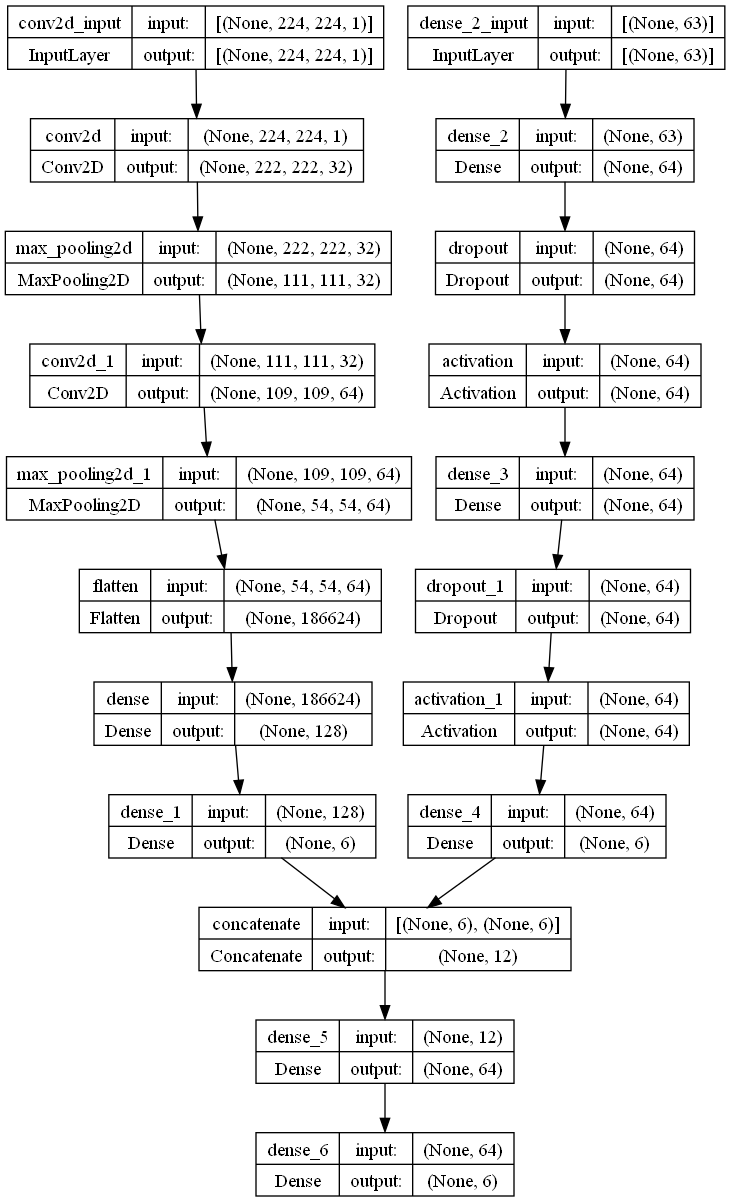

In [8]:
# Visualize and save combined model structure image
tf.keras.utils.plot_model(
    combined_model,
    to_file="combined_model.png",
    show_shapes=True,
    show_layer_names=True,
)

### Step 5: Model Training

<b>Note:</b> All configuration for the model including structure, number of epochs, and batch size were determined as it was the best model (for me) after many trials. 

In [14]:
import wandb
from wandb.keras import WandbCallback
from keras.callbacks import ModelCheckpoint

# Initialize wandb for experiment progress tracking and visualization (optional)
# wandb.init(project="hand-gesture-recognition")

# Define a callback to only save the best model based on validation loss
checkpoint = ModelCheckpoint(
    "hand_gesture_model_best.h5",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="min",
)

# Load the saved model
combined_model = tf.keras.models.load_model("hand_gesture_model_best.h5")

# Train the combined model
history = combined_model.fit(
    [images_train, landmarks_train],
    labels_train,
    validation_data=([images_test, landmarks_test], labels_test),
    epochs=100,
    batch_size=64,
    callbacks=[checkpoint],
   # callbacks=[checkpoint, WandbCallback()],
)  # wandb callback to log metrics during training

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 0.2519 - accuracy: 0.8983
Epoch 1: val_loss improved from inf to 0.14462, saving model to hand_gesture_model_best_v5.h5
38/38 [==============================] - 34s 884ms/step - loss: 0.2519 - accuracy: 0.8983 - val_loss: 0.1446 - val_accuracy: 0.9417
Epoch 2/100


/Users/zai28/miniconda3/envs/env/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - ETA: 0s - loss: 0.2497 - accuracy: 0.8963
Epoch 2: val_loss improved from 0.14462 to 0.14259, saving model to hand_gesture_model_best_v5.h5
38/38 [==============================] - 40s 1s/step - loss: 0.2497 - accuracy: 0.8963 - val_loss: 0.1426 - val_accuracy: 0.9433
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 0.2617 - accuracy: 0.8904
Epoch 3: val_loss did not improve from 0.14259
38/38 [==============================] - 39s 1s/step - loss: 0.2617 - accuracy: 0.8904 - val_loss: 0.1444 - val_accuracy: 0.9450
Epoch 4/100
38/38 [==============================] - ETA: 0s - loss: 0.2624 - accuracy: 0.8842
Epoch 4: val_loss did not improve from 0.14259
38/38 [==============================] - 44s 1s/step - loss: 0.2624 - accuracy: 0.8842 - val_loss: 0.1449 - val_accuracy: 0.9583
Epoch 5/100
38/38 [==============================] - ETA: 0s - loss: 0.2332 - accuracy: 0.9004
Epoch 5: val_loss improved from 0.14259 to 0.13597, s

### Step 6: Results Visualization
Once the model is done training, we can visualize the training and validation accuracy and loss.

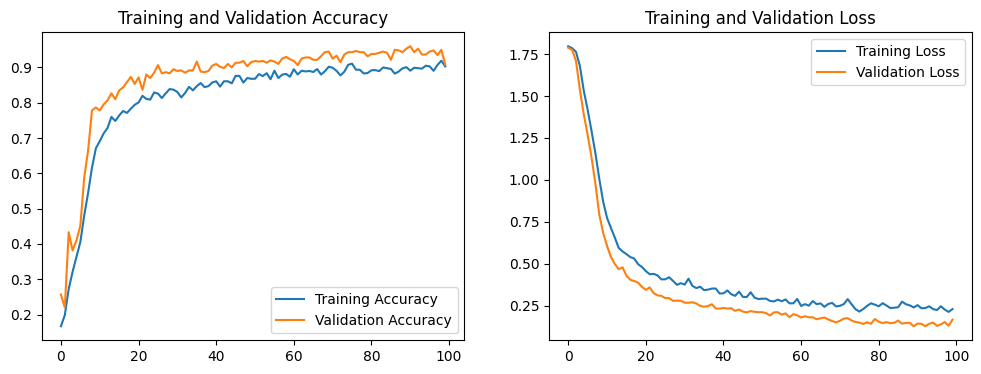

In [10]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")

# Display the plot
plt.show()

### Step 7: Model Evaluation

After training and visualizing the results, we need to evaluate the model on our test dataset to understand how well the model performs on unseen data.

In [16]:
# Load the saved model
combined_model = tf.keras.models.load_model("hand_gesture_model_best.h5")

# Evaluate the model
test_loss, test_accuracy = combined_model.evaluate(
    [images_test, landmarks_test], labels_test
)
print(f"Validation accuracy: {test_accuracy}")
print(f"Validation loss: {test_loss}")

19/19 [==============================] - 2s 92ms/step - loss: 0.0540 - accuracy: 0.9917
Validation accuracy: 0.9916666746139526
Validation loss: 0.054048486053943634


<b>Note:</b> At this point, we should have a well-functioning and accurate hand gesture recognition model.

# 6. Integrate Hand Gesture Recognition for Apple TV Control

<p> With the hand gesture recognition model, the final step is to integrate the model with Apple TV remote control by mapping each gesture to a command. This integration allows for a more interactive and intuitive way to control the Apple TV, transforming the way we interact with our devices. The following steps outline how this integration is achieved: </p>

- **Import Libraries**: The necessary libraries for image processing, machine learning, and interaction with Apple TV are imported.

- **Load Trained Model**: The trained model for hand gesture recognition is loaded into the script.

- **Initialize MediaPipe Hands**: Google's MediaPipe library is used to identify hand landmarks.

- **Connect to Apple TV**: The code scans for and connects Apple TV and AirPlay devices. It also includes a pairing process of entering a 4-digit code prompted on TV screen. 

- **Main Loop**: Inside the main loop, the code performs the following steps:
   - **Capture Video**: The video from the webcam is captured and processed.
   - **Detect Hands**: The hand landmarks are detected, and a bounding box is drawn around the detected hand.
   - **Preprocess Image**: The hand image is cropped, resized, and processed as required by the trained model.
   - **Predict Gesture**: The model predicts the hand gesture.
   - **Control Apple TV**: Depending on the detected gesture, commands are sent to the Apple TV (e.g., click, power_on, power_off, scroll, menu, home).
   - **Display Output**: The video frame, along with the detected hand, bounding box, and prediction, is displayed to the user.

   <br>
- **Close Connection**: After exiting the loop (by pressing 'q'), the connection to the Apple TV is closed, and the video capture is released.

<p> The gestures like click, scroll, power_on, power_off, menu, and home are interpreted and mapped to specific commands for controlling Apple TV. This code demonstrates an exciting use of machine learning and computer vision in creating a more interactive remote control system to control TV with our hands, enhancing human-computer interaction and bridging the gap between technology and natural human behavior. </p>

In [1]:
# Import necessary libraries
import cv2
import mediapipe as mp
import tensorflow as tf
import numpy as np
import time
import asyncio
import nest_asyncio
from pyatv import scan, pair, connect
from pyatv.const import Protocol

# Enable nested event loops to allow usage of ascyncio
nest_asyncio.apply()


async def main():
    # Load the trained model for hand gesture recognition
    model = tf.keras.models.load_model("hand_gesture_model_best.h5")

    # Open the video capture
    cap = cv2.VideoCapture(0)

    mp_hands = mp.solutions.hands  # Initialize the hands model
    hands = mp_hands.Hands(
        max_num_hands=1, min_detection_confidence=0.7, min_tracking_confidence=0.5
    )

    # To help draw the landmarks onto the image
    mp_drawing = mp.solutions.drawing_utils

    # Specifying DrawingSpec for the hand landmarks and connections
    draw_spec_landmarks = mp_drawing.DrawingSpec(
        color=(0, 0, 255), thickness=2, circle_radius=2
    )
    draw_spec_connections = mp_drawing.DrawingSpec(
        color=(255, 255, 255), thickness=2, circle_radius=2
    )

    # Create a dictionary to map integers back to labels
    label_dict = {
        0: "power_on",
        1: "power_off",
        2: "scroll",
        3: "menu",
        4: "home",
        5: "click",
    }

    # Initialize variables to help processing gestures to map to control commands
    previous_distance = (
        None  # Distance between pointer finger and thumb for "click" gesture
    )
    previous_index_position = (
        None  # Index finger position in the previous frame for "scroll" gesture
    )
    gesture_start_times = (
        {}
    )  # Create a dictionary to keep track of start times for each gesture

    # 1. Scan for Apple TV devices
    loop = asyncio.get_event_loop()
    atvs = await scan(loop)
    atv = atvs[1]  # Index corresponding to the target Apple TV device

    # 2. Start pairing process
    pairing = await pair(atv, Protocol.Companion, loop)
    await pairing.begin()

    if pairing.device_provides_pin:
        pin = int(input("Enter PIN: "))  # Enter the PIN shown on Apple TV screen
        pairing.pin(pin)
    else:
        pairing.pin(1234)  # Should be randomnized
        input("Enter this PIN on the device: 1234")

    await pairing.finish()

    # Give some feedback about the process
    if pairing.has_paired:
        print("Paired with device!")
        print("Credentials:", pairing.service.credentials)
    else:
        print("Did not pair with device!")

    await pairing.close()

    # 3. Connect to the device
    atv = await connect(atv, loop)

    # Once connected to the device, start video capture for recognizing hand gestures
    while True:
        _, frame = cap.read()

        # Convert the BGR image to RGB before processing
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the image for hand detection
        results = hands.process(image)

        # If hand is detected in the frame
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw the hand landmarks on the screen
                mp_drawing.draw_landmarks(
                    frame,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    draw_spec_landmarks,
                    draw_spec_connections,
                )

                # 1. Preprocess data
                # Convert and reshape hand landmarks data to np array
                landmarks = np.array(
                    [
                        [landmark.x, landmark.y, landmark.z]
                        for landmark in hand_landmarks.landmark
                    ]
                )

                # Get bounding box
                bbox = landmarks_to_bbox(landmarks)

                # Get bounding box for drawing (different padding ratio)
                bbox_draw = landmarks_to_bbox(landmarks, padding_ratio=0.1)

                # Convert bounding box position to pixel coordinates
                bbox_draw_pixel = (
                    bbox_draw
                    * np.array(
                        [frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]]
                    )
                ).astype(int)

                # Draw bounding box in Green (BGR)
                cv2.rectangle(
                    frame,
                    (bbox_draw_pixel[0], bbox_draw_pixel[1]),
                    (bbox_draw_pixel[2], bbox_draw_pixel[3]),
                    (0, 255, 0),
                    2,
                )

                # Crop and resize hand image from the frame based on bounding box
                hand_image = crop_and_resize_images([frame], [bbox])[0]

                # Convert the hand image to grayscale
                gray = cv2.cvtColor(hand_image, cv2.COLOR_BGR2GRAY)

                # Add an extra dimension
                processed_image = np.expand_dims(gray, axis=-1)

                # Normalize processed_images to [0, 1]
                cnn_input = processed_image / 255.0
                cnn_input = np.expand_dims(cnn_input, axis=0)  # Add batch dimension

                # Prepare the hand landmarks for MLP
                mlp_input = landmarks.flatten()  # Flatten to 1D array
                mlp_input = np.expand_dims(mlp_input, axis=0)  # Add batch dimension

                # 2. Feed the preprocessed data into the model and make predictions
                prediction = model.predict([cnn_input, mlp_input])

                # Get the gesture class with the highest probability
                class_index = np.argmax(prediction)

                # Get the string representation of the label
                label = label_dict[class_index]

                # Case 1: "click" gesture -> Select/Enter + Play/Pause
                if label == "click":
                    # Get the coordinates for the thumb and index finger tips
                    thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
                    index_finger_tip = hand_landmarks.landmark[
                        mp_hands.HandLandmark.INDEX_FINGER_TIP
                    ]

                    # Convert to pixel coordinates
                    thumb_coords = (
                        int(thumb_tip.x * frame.shape[1]),
                        int(thumb_tip.y * frame.shape[0]),
                    )
                    index_coords = (
                        int(index_finger_tip.x * frame.shape[1]),
                        int(index_finger_tip.y * frame.shape[0]),
                    )

                    # Draw a line between the thumb tip and index finger tip
                    cv2.line(frame, thumb_coords, index_coords, (255, 0, 0), 2)

                    # Calculate the distance between thumb and index finger tips
                    distance = np.sqrt(
                        (thumb_coords[0] - index_coords[0]) ** 2
                        + (thumb_coords[1] - index_coords[1]) ** 2
                    )

                    # Check if a tap has occurred (distance threshold = 20)
                    if (
                        previous_distance is not None
                        and previous_distance < 20
                        and distance > 20
                    ):
                        # Calculate the midpoint where the tap occurs
                        midpoint = (
                            (thumb_coords[0] + index_coords[0]) // 2,
                            (thumb_coords[1] + index_coords[1]) // 2,
                        )

                        # Draw a green circle at the midpoint
                        cv2.circle(
                            frame, midpoint, radius=10, color=(0, 255, 0), thickness=-1
                        )

                        gesture_start_times = {}  # Reset the start time dictionary
                        await atv.remote_control.select()  # Send remote control command "select" to the Apple TV

                    # Update the previous distance
                    previous_distance = distance

                # Case 2: "power_on" gesture -> Turn on
                elif label == "power_on":
                    # Get the current time
                    current_time = time.time()

                    # Check if the power_on gesture has started
                    if "power_on" in gesture_start_times:
                        # Calculate the time difference from the gesture start time
                        time_difference = current_time - gesture_start_times["power_on"]

                        # Check if the time difference is more than 3 seconds
                        if time_difference > 3:
                            gesture_start_times = {}  # Reset the start time dictionary
                            await atv.power.turn_on()  # Send remote control command to "turn on" the Apple TV

                    else:
                        # Start the timer for the 'power_on' gesture
                        gesture_start_times = {"power_on": current_time}

                # Case 2: "power_off" gesture -> Turn off
                elif label == "power_off":
                    # Get the current time
                    current_time = time.time()

                    # Check if the "power_off" gesture has started
                    if "power_off" in gesture_start_times:
                        # Calculate the time difference from the gesture start time
                        time_difference = (
                            current_time - gesture_start_times["power_off"]
                        )

                        # Check if the time difference is more than 3 seconds
                        if time_difference > 3:
                            gesture_start_times = {}  # Reset the start time dictionary
                            await atv.power.turn_off()  # Send remote control command to "turn off" the Apple TV

                    else:
                        # Start the timer for the 'power_off' gesture
                        gesture_start_times = {"power_off": current_time}

                # Case 3: "menu" gesture -> Menu/Back
                elif label == "menu":
                    # Get the current time
                    current_time = time.time()

                    # Check if the "menu" gesture has started
                    if "menu" in gesture_start_times:
                        # Calculate the time difference from the gesture start time
                        time_difference = current_time - gesture_start_times["menu"]

                        # Check if the time difference is more than 1.5 seconds
                        if time_difference > 1.5:
                            gesture_start_times = {}  # Reset the start time dictionary
                            await atv.remote_control.menu()  # Send remote control command "menu" to the Apple TV

                    else:
                        # Start the timer for the 'menu' gesture
                        gesture_start_times = {"menu": current_time}

                # Case 4: "home" gesture -> Home/Control Center
                elif label == "home":
                    # Get the current time
                    current_time = time.time()

                    # Check if the "home" gesture has started
                    if "home" in gesture_start_times:
                        # Calculate the time difference from the gesture start time
                        time_difference = current_time - gesture_start_times["home"]

                        # Check if the time difference is more than 1 second
                        if time_difference > 1:
                            gesture_start_times = {}  # Reset the start time dictionary
                            await atv.remote_control.home()  # Send remote control command "home" to Apple TV

                    else:
                        # Start the timer for the 'home' gesture
                        gesture_start_times = {"home": current_time}

                # Case 5: "scroll" gesture -> Up/down/Right/Left
                elif label == "scroll":
                    # Get the coordinates for the index finger tip
                    index_finger_tip = hand_landmarks.landmark[
                        mp_hands.HandLandmark.INDEX_FINGER_TIP
                    ]

                    # Convert to pixel coordinates
                    index_coords = (
                        int(index_finger_tip.x * frame.shape[1]),
                        int(index_finger_tip.y * frame.shape[0]),
                    )

                    # Draw a blue circle at the index finger tip
                    cv2.circle(
                        frame, index_coords, radius=10, color=(255, 0, 0), thickness=-1
                    )

                    if previous_index_position is not None:
                        # Calculate the difference between previous and current index finger tip position
                        dx, dy = (
                            index_coords[0] - previous_index_position[0],
                            index_coords[1] - previous_index_position[1],
                        )

                        # Take absolute difference to account for negative displacements
                        abs_dx, abs_dy = abs(dx), abs(dy)

                        if (
                            abs_dx > 20 or abs_dy > 20
                        ):  # Add distance threshold = 20 to avoid noise in movements
                            if (
                                abs_dx > abs_dy
                            ):  # Movement in x/horizontal direction is greater than in y/vertical direction
                                if dx > 0:  # Moved right (left irl)
                                    await atv.remote_control.left()  # Send remote control command "left" to Apple TV

                                else:  # Moved left (right irl)
                                    await atv.remote_control.right()  # Send remote control command "right" to Apple TV

                            else:  # Movement in y/vertical direction is greater than in x/horizontal direction
                                if dy > 0:  # Moved down
                                    await atv.remote_control.down()  # Send remote control command "down" to Apple TV

                                else:  # Moved up
                                    await atv.remote_control.up()  # Send remote control command "up" to Apple TV

                    gesture_start_times = {}  # Reset the start time dictionary
                    previous_index_position = index_coords  # Update previous position

                # Write the class prediction on the screen
                cv2.putText(
                    frame,
                    f"Prediction: {label}",
                    (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1,
                    (0, 0, 255),
                    2,
                )

        # Display the frame of video capture
        cv2.imshow("Hand Tracking", frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    # Close video capture and connection to Apple TV device once finished
    cap.release()
    cv2.destroyAllWindows()
    atv.close()


asyncio.run(main())  # Run the main loop

KeyboardInterrupt: 